#                               PCA

# Task 1: Exploratory Data Analysis

The task 1 is contains of loading the dataset and performing the basic data exploration.Examines the distribution of features using histograms, boxplot or density plots.It investigets the correlations between features to understand relationships within the data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [5]:
 wine_data = load_wine()

In [7]:
df=pd.read_csv(r'C:\Users\srava\AppData\Local\Temp\7dc6b4b2-effc-40d7-9c69-8dd10d960265_PCA.zip.265\PCA\wine.csv')

In [8]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
df['target']=wine_data.target

In [10]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (178, 15)

First 5 rows:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  target  
0           0.28             2.29   5.64  1.04      3.92     1065       0  
1           0.26             1.28   4.38  1.05      3.40     1050       0  
2           0.30             2.81   5.68  1.03      3.17     1185       0  
3           0.24             2.18   7.80  0.86      3.45     1480       0  
4           0.39             1.82   4.32  1.04      2.93      735       0  

Data types:
 Type                 in

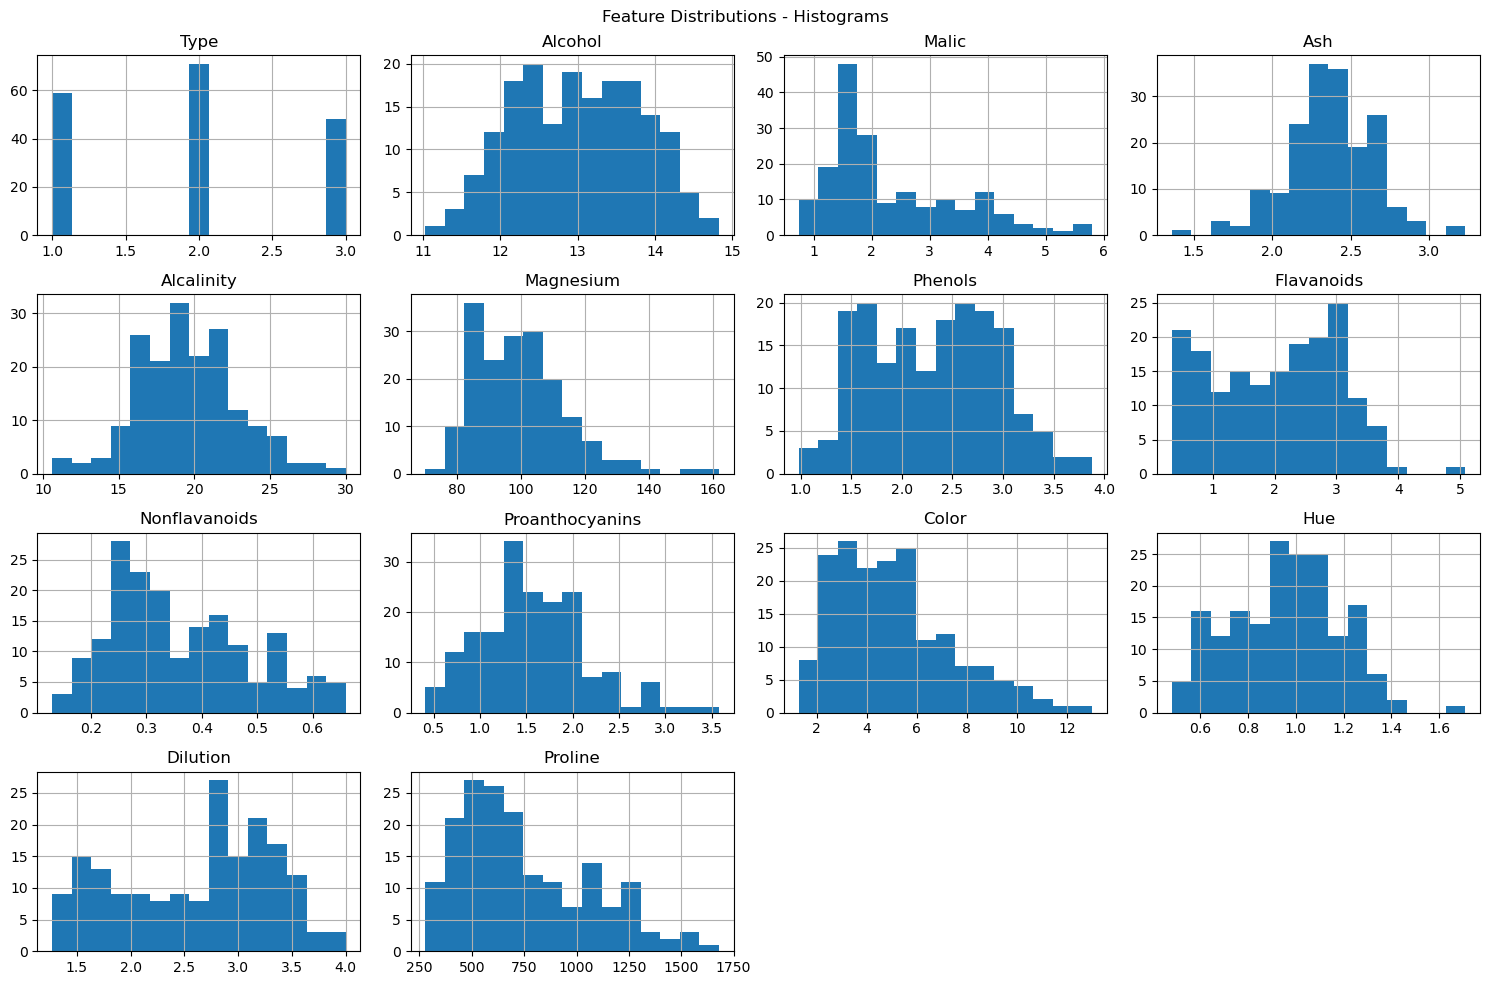

In [11]:
df.iloc[:, :-1].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Feature Distributions - Histograms')
plt.tight_layout()
plt.show()


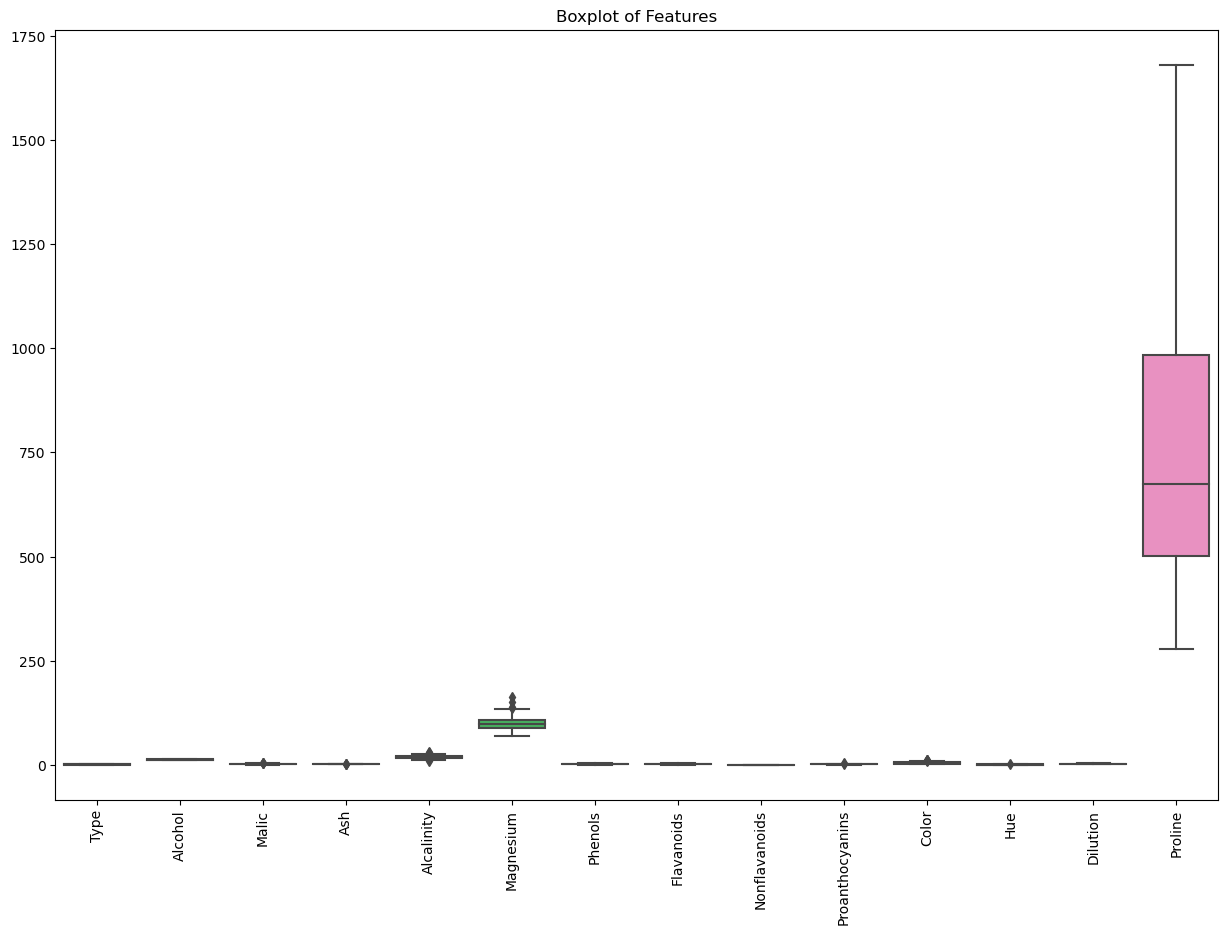

In [12]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

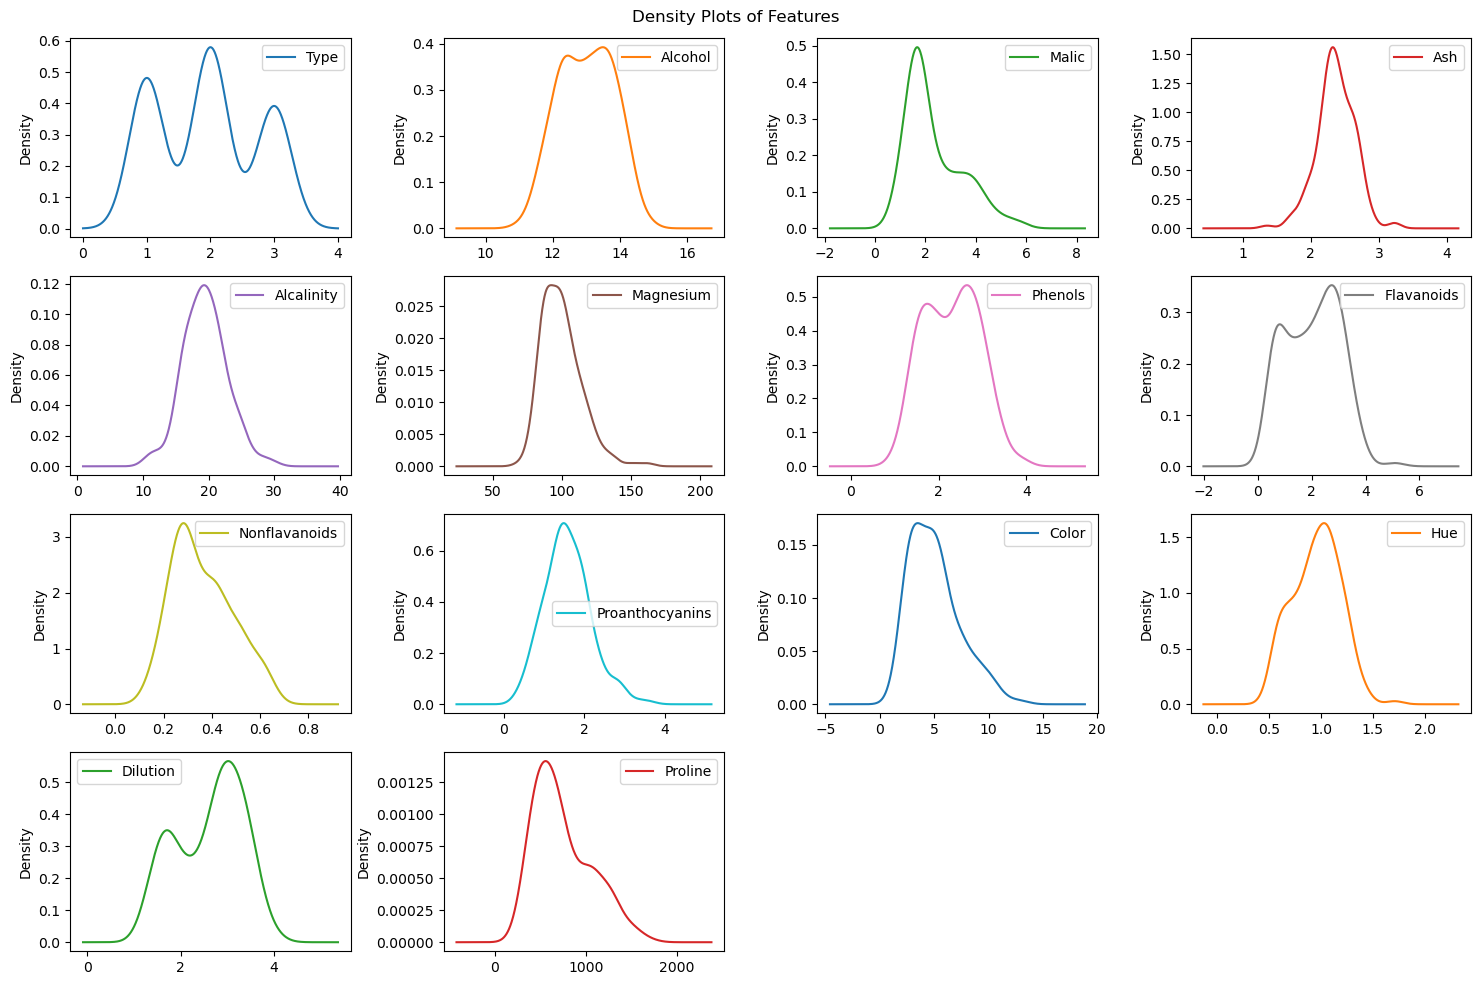

In [13]:
df.iloc[:, :-1].plot(kind='density', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False)
plt.suptitle('Density Plots of Features')
plt.tight_layout()
plt.show()

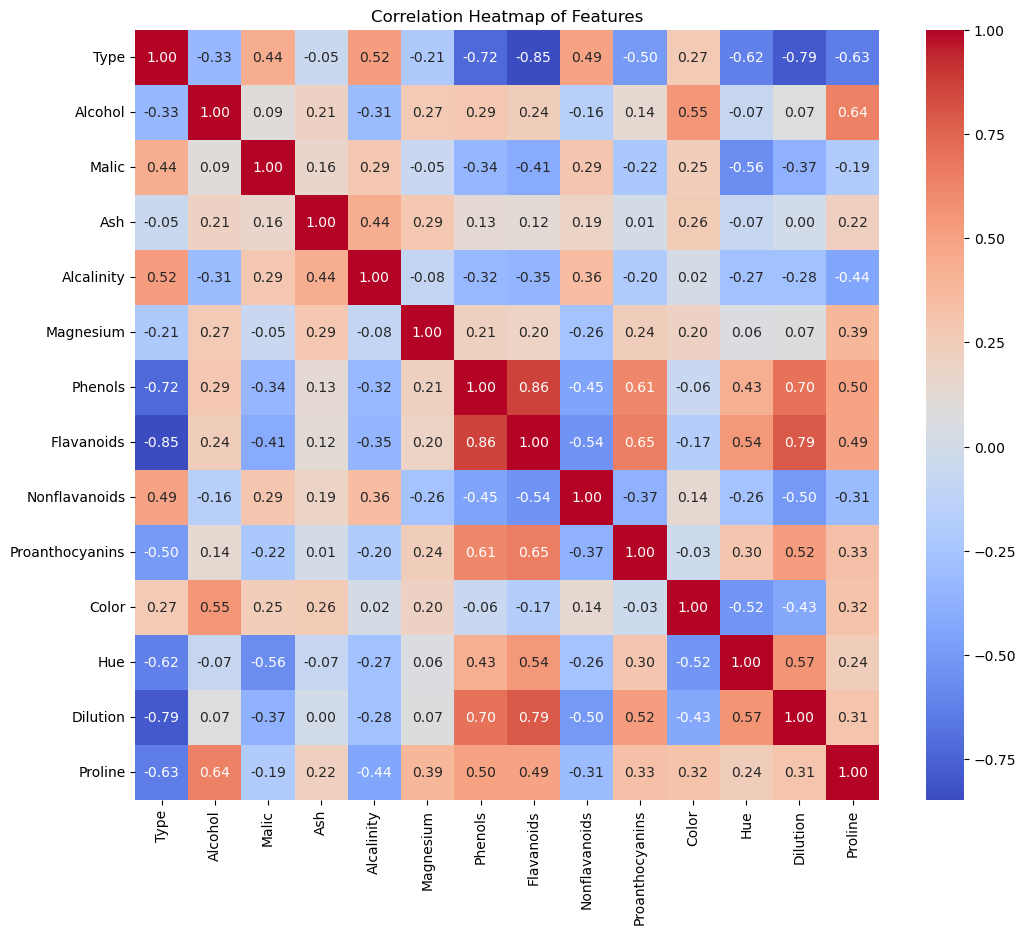

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Task 2: Dimensionality Reduction with PCA

The tast 2 is contains of means zero and a standard deviation of implimentaion PCA to reduce the dimensionality of the dataset.
Determining the optimal number of principal components using techniques like screenplot or cumulative explained varience.
Transforming the original dataset into the principal components.

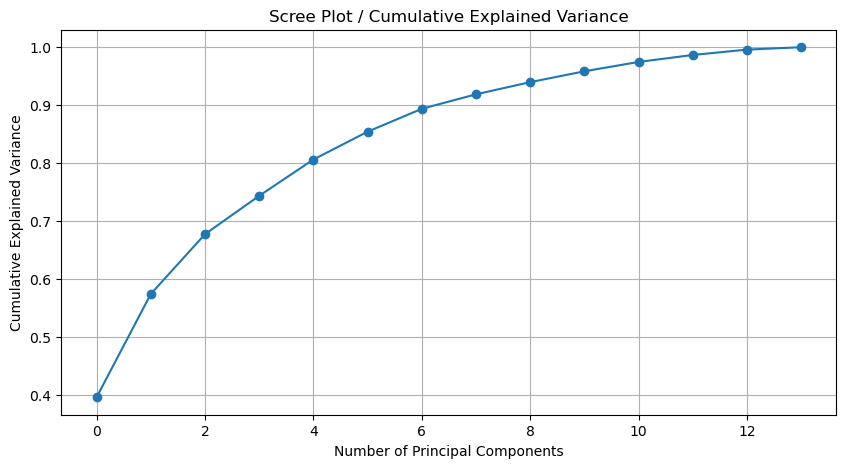

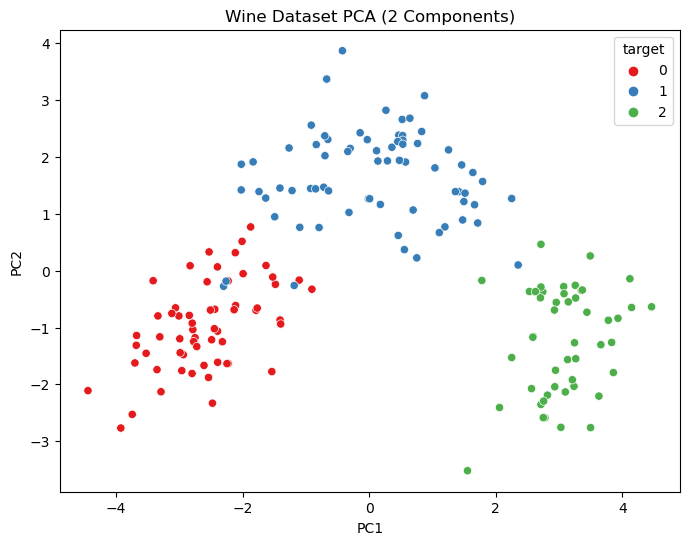

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot / Cumulative Explained Variance')
plt.grid()
plt.show()
pca_final = PCA(n_components=2)
X_pca_final = pca_final.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca_final, columns=['PC1', 'PC2'])
pca_df['target'] = y
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='Set1')
plt.title('Wine Dataset PCA (2 Components)')
plt.show()

# Task 3: Clustering with Original Data:

The task 3 is contains of clustering algorithm to the original dataset, and visualizing the clustering results using appropriate plots and clustering performence using metrics such as silhouette score or DaviesBouldin index.

C:\Users\srava\.anaconda\hitesh\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srava\.anaconda\hitesh\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


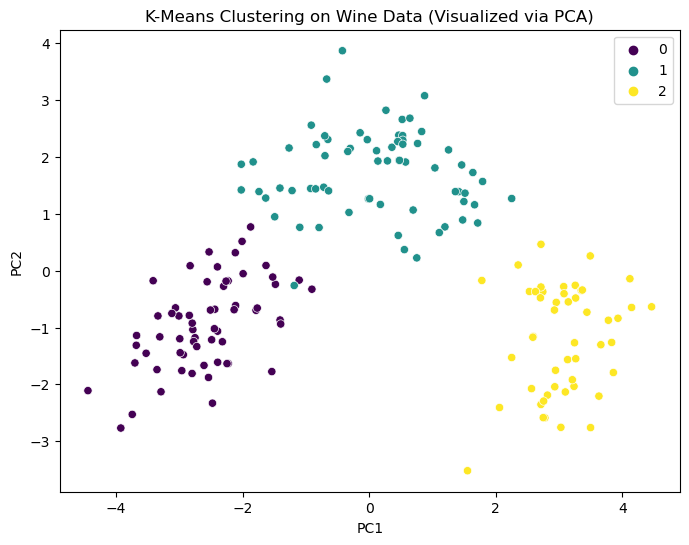

Silhouette Score: 0.308
Davies-Bouldin Index: 1.316


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=clusters, data=pca_df, palette='viridis')
plt.title('K-Means Clustering on Wine Data (Visualized via PCA)')
plt.show()
silhouette = silhouette_score(X_scaled, clusters)
db_score = davies_bouldin_score(X_scaled, clusters)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")

# Task 4: Clustering with PCA Data:

1. Clustering algorithm to the PCA transformed dataset.

In [25]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(X_pca_final)
pca_df['PCA_Cluster'] = pca_clusters

C:\Users\srava\.anaconda\hitesh\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srava\.anaconda\hitesh\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2. Clustering results obtained from PCA tranformed data

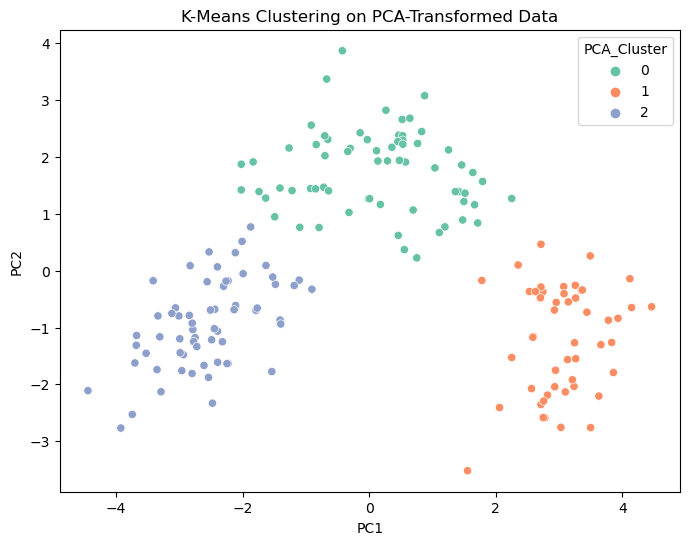

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='PCA_Cluster', palette='Set2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.show()

3. Culstering results from PcA transformed data with those from the original dataset.

In [24]:
silhouette_pca = silhouette_score(X_pca_final, pca_clusters)
db_index_pca = davies_bouldin_score(X_pca_final, pca_clusters)

print(f"Silhouette Score (PCA data): {silhouette_pca:.3f}")
print(f"Davies-Bouldin Index (PCA data): {db_index_pca:.3f}")

Silhouette Score (PCA data): 0.602
Davies-Bouldin Index (PCA data): 0.540


# Task 5:

1. Clustering on original data achieved a Silhouette Scoreof 0.602, while PCA transformed data gave a score of 0.602 as well.Cluster shapes and seperation can be visualized more easily in 2D PCA shape.

2. PCA helps simplify data without losing too much variance.Clutering on PCA data is faster and allows better visualization.There might be slight variation in clustering assignments due to dimensionality reduction.

3. PCA reduced noice and redundancy in the dataset.It preserved the major structute needed for clustering.It may lead to loss of minor patterns but helps in generalization.

4. Using PCA, better visualization, faster compution, good for high dimensional data.
   Original data, preserves full information, possibly better clustering performence on complex datasets.

# Task 6:

1. PCA effectively reduced dimensionality while retaining essential data patterns.K-means clustering performed comparably on both original and PCA-transformed data.Visualizations in PCA space clearly showed cluster separations.

2.  PCA is useful when dealing with high-dimensional datasets or when visualization is needed.
   Clustering results remain robust after PCA if variance is well-retained.
   Dimensionality reduction can improve speed and clarity, especially for large or noisy datasets.


3. Use PCA before clustering when dealing with many features or for visualization purposes.
  Avoid PCA if original features have strong interpretability or if small details matter.
  Always evaluate clustering performance using metrics like silhouette score and Davies–Bouldin Index to choose the better approach.       